<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Test-different-versions-of-the-Clausius-Clapyron-equation" data-toc-modified-id="Test-different-versions-of-the-Clausius-Clapyron-equation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test different versions of the Clausius-Clapyron equation</a></span></li><li><span><a href="#Define-the-four-different-ways-to-get-es" data-toc-modified-id="Define-the-four-different-ways-to-get-es-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define the four different ways to get es</a></span></li></ul></div>

# Test different versions of the Clausius-Clapyron equation

Bottom line -- rootfinding, the full explicit equation, and the curve fit
all give almost identical results compared to the approximate standard_es

This notebook makes use of the convenience functions in [rootfinder.py](https://github.com/phaustin/atsc405_2018/blob/master/a405/thermo/rootfinder.py)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from a405.thermo import rootfinder as rf
from a405.thermo.constants import constants as c

Tp = 273.16  #K
cpv=1870.  #J/kg/K
cl=4187.  #J/kg/K
es0=6.112 #hPa
Tc=273.15
lv0=2.501e6  #J/kg
phi0=lv0/Tp  #J/kg/K
Rv= 461.5

def standard_es(temp):
    """
    Thompkins equation 2.13
    
    Parameters
    ----------
    temp: float
      temperature (K)
      
    Returns
    -------
    
    es: float
      saturation vapor pressure (hPa)
    """
    es=c.es0*np.exp(c.lv0/c.Rv*((1./c.Tc) - (1./temp)))
    return es

def find_esat(temp):
    """
    More accurate empical fit from Emanuel
    
    Parameters
    ----------
    temp: float
      temperature (K)
      
    Returns
    -------
    
    es: float
      saturation vapor pressure (hPa)
      
    """
    temp = temp - c.Tc
    es=c.es0*np.exp(17.67*temp/(temp + 243.5))
    return es

# Define the four different ways to get es

In [2]:
def lv_fun(temp):
    """
    latent heat as a function of temperature
    """
    out=(c.cpv - c.cl)*(temp-Tp) + lv0
    return out

def zero_es(esat,temp):
    """
      rootfinder: version of esat
      esat = esat in hPa
      temp: temperature in K
    """
    lv=lv_fun(temp)
    resid =  c.cpv*np.log(temp/c.Tp) - c.Rv*np.log(esat/c.es0) + \
        c.phi0 - c.cl*np.log(temp/c.Tp) - lv/temp
    return resid

def good_es(temp):
    """
       full version from my notes
    """
    lv=lv_fun(temp)
    body = (c.cpv*np.log(temp/c.Tp) + c.phi0 - 
            c.cl*np.log(temp/c.Tp) - lv/temp)/c.Rv
    out=c.es0*np.exp(body)
    return(out)

def zero_find_es(temp):
    esguess=standard_es(temp)
    brackets=rf.find_interval(zero_es,esguess,temp)
    resid = rf.fzero(zero_es,brackets,temp)
    return resid

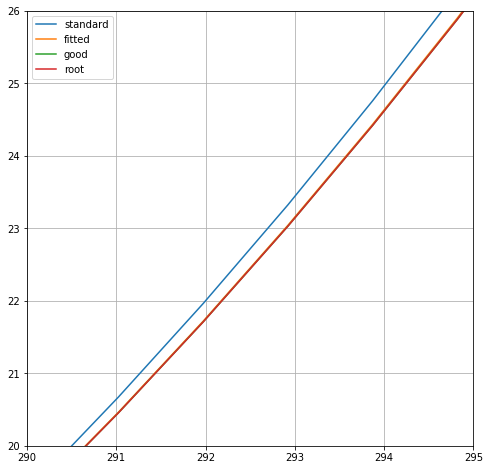

In [3]:
%matplotlib inline
temp=np.linspace(273,310,40)
es_root=[zero_find_es(Tk) for Tk in temp]

fig,ax = plt.subplots(1,1,figsize=(8,8))
es_stand = standard_es(temp)
es_fit = find_esat(temp)
es_good = good_es(temp)
ax.plot(temp,es_stand,label='standard')
ax.plot(temp,es_fit,label='fitted')
ax.plot(temp,es_good,label='good')
ax.plot(temp,es_root,label='root')
ax.set(xlim=(290,295),ylim=(20,26))
ax.grid(True)
ax.legend();
